In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# Defina local do arquivo e faz a leitura da base
path = r"C:\Users\mrthu\OneDrive\Study\Python-Data-Science\Databases\Pokemon\Pokemon.csv"
df = pd.read_csv(path)

In [75]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [80]:
# Verifica informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df_legendary = df.loc[df['Legendary']==True]
df_legendary

In [ ]:
df['Type 2'].value_counts()

In [ ]:
df['Type 1'].value_counts()

In [65]:
def med (grupo,coluna):
    # Calcule a média da coluna desejada para cada tipo em GRUPO
    media_HP_por_tipo = df.groupby(grupo)[coluna].mean().reset_index()
    
    # Adicione uma coluna com a quantidade de vezes que cada tipo se repete
    media_HP_por_tipo['qty'] = df[grupo].value_counts().values

    # Ordene os resultados
    media_HP_por_tipo.sort_values(by=coluna, inplace=True)
    # Reseta Index
    media_HP_por_tipo.reset_index(drop=True, inplace=True)
    
    return media_HP_por_tipo


In [ ]:
med('Generation','Total')

In [ ]:
# Media de Total por tipo 1
df_tipo1 = df.groupby('Type 1')['Total'].mean()

plt.bar(df_tipo1.index,df_tipo1)

for i in range(len(df_tipo1)):
    plt.text(x=i,y=df_tipo1[i],s= int(df_tipo1[i]), ha='center')
    
plt.xticks(rotation=90)

In [ ]:
# Media de Total por tipo 1

df_tipo2 = df_legendary.groupby('Type 1')['Total'].mean()

plt.bar(df_tipo2.index,df_tipo2)

for i in range(len(df_tipo2)):
    plt.text(x=i,y=df_tipo2[i],s= int(df_tipo2[i]), ha='center')
    
plt.xticks(rotation=90)

In [ ]:
# What is the fastest type ?

speed_df = med('Type 1','Speed').sort_values('Speed',ascending=False)
speed_df

In [79]:
df['Type 2'].count()

414

In [135]:
# 1 gen pokemons, excluded Mega

gen1_df = df


In [136]:
# Split 
gen1_df[['Name1', 'Mega']] = gen1_df['Name'].str.split('Mega', expand=True)
gen1_df = df.loc[(df['Generation']==1) & (~gen1_df['Mega'].notna())]

gen1_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name1,Mega
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur,None
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Ivysaur,None
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Venusaur,None
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Charmander,None
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Charmeleon,None
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Charizard,None
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Squirtle,None
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,Wartortle,None
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blastoise,None
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Caterpie,None


In [ ]:
gen1_df.drop(['Name','#'], axis=1, inplace=True)

In [138]:
gen1_df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name1,Mega
0,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur,None
1,Grass,Poison,405,60,62,63,80,80,60,1,False,Ivysaur,None
2,Grass,Poison,525,80,82,83,100,100,80,1,False,Venusaur,None
4,Fire,NaN,309,39,52,43,60,50,65,1,False,Charmander,None
5,Fire,NaN,405,58,64,58,80,65,80,1,False,Charmeleon,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Dragon,NaN,300,41,64,45,50,50,50,1,False,Dratini,None
160,Dragon,NaN,420,61,84,65,70,70,70,1,False,Dragonair,None
161,Dragon,Flying,600,91,134,95,100,100,80,1,False,Dragonite,None
162,Psychic,NaN,680,106,110,90,154,90,130,1,True,Mewtwo,None


In [ ]:
for i in range(len(gen1_df.columns)):
    print(gen1_df.columns[i])
    

In [161]:
gen1_mean = gen1_df.groupby('Type 1')[['Total','Speed','Attack','Defense','HP']].mean()

In [174]:
gen1_mean['Count'] = gen1_df.groupby('Type 1').size()
gen1_mean

,Total,Speed,Attack,Defense,HP,Count
Type 1,,,,,,
Bug,336.250000,57.083333,63.750000,57.083333,55.416667,12
Dragon,440.000000,66.666667,94.000000,68.333333,64.333333,3
Electric,444.444444,98.888889,62.000000,64.666667,54.444444,9
Fairy,403.000000,47.500000,57.500000,60.500000,82.500000,2
Fighting,412.142857,66.142857,102.857143,61.000000,63.571429,7
Fire,455.583333,84.000000,83.916667,62.583333,63.833333,12
Ghost,405.000000,95.000000,50.000000,45.000000,45.000000,3
Grass,409.416667,52.083333,70.666667,69.583333,65.000000,12
Ground,374.375000,58.125000,81.875000,86.250000,58.125000,8


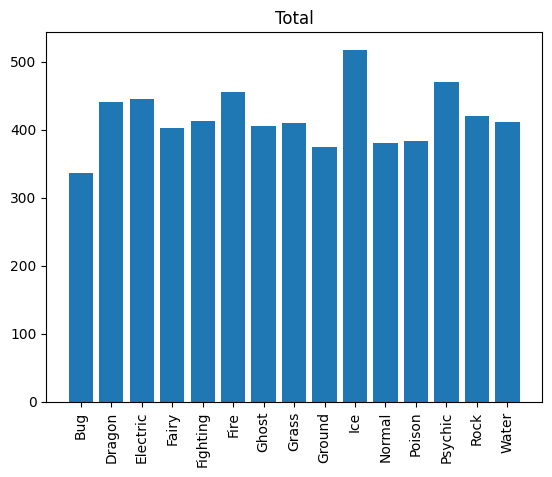

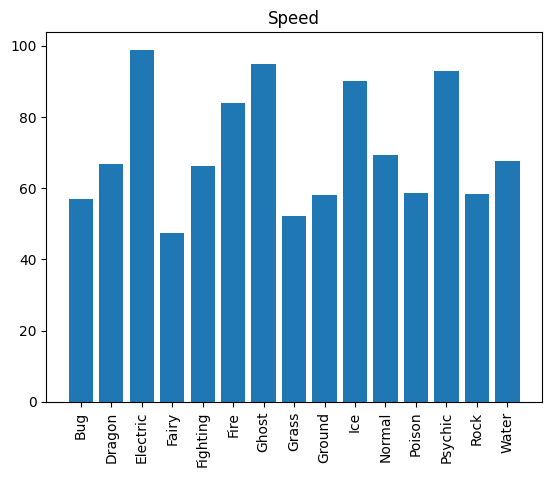

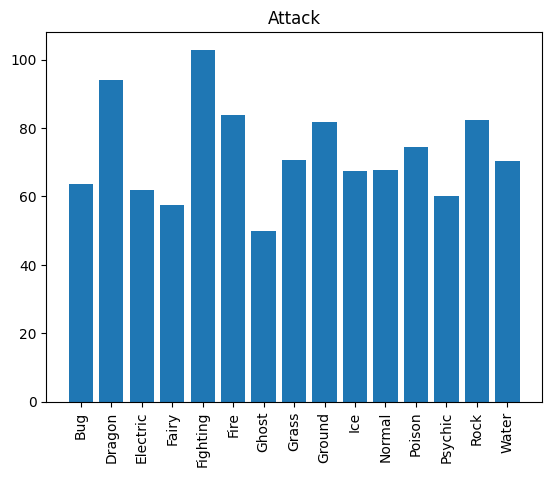

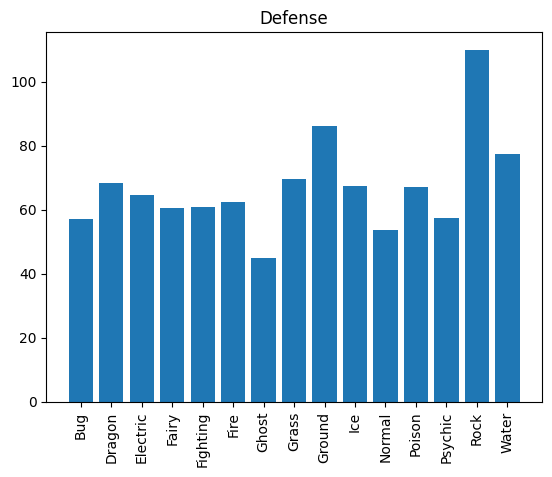

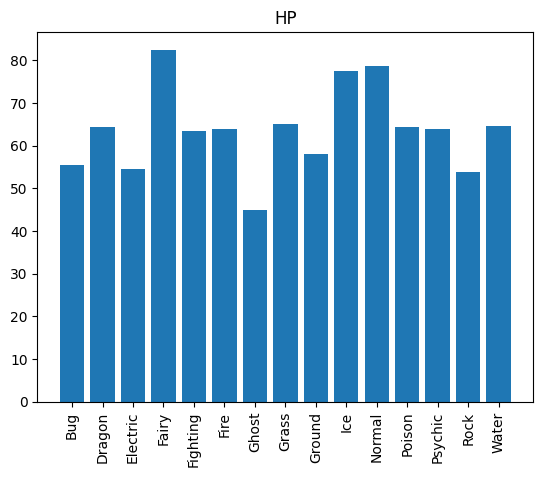

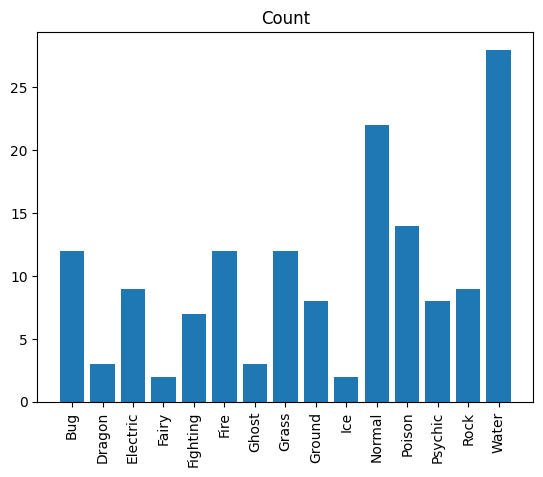

In [189]:
# Gen1 analysis 
for coluna in gen1_mean.columns:
    plt.bar(gen1_mean.index,gen1_mean[coluna])
    plt.title(coluna)
    plt.xticks(rotation=90)
    plt.show()